In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def sortcoord(fun, M):
    N = M.shape[1]
    f = [fun(M[:, i]) for i in range(N)]
    M = M[:, np.argsort(f)]
    return M

# Норма матрицы
def normM(M):
    m = M.shape[1]
    D = np.zeros((m-1,m))
    for i in range(m):
        for j in range(m)[i+1:]:
            D[i,j] = np.sqrt(np.sum(list(map(lambda x: x*x, M[:,i] - M[:,j]))))
    return np.sqrt(np.max(D))

In [3]:
def ofSimplex(fun, ndim = 2, eps = 1e-4, fit = np.array([0.1, 0.1]), low = [-1, -1], up = [1, 1]):
    k = 0
    N = ndim
    Xx = np.zeros((N, N+1))
    coords = []
    for i in range(N+1):
        Xx[:,i] = fit

    for i in range(N):
        Xx[i,i] += 0.5*np.sqrt(np.sum(list(map(lambda x: x*x, fit)))) + eps
    
    p = normM(Xx)
    while p > eps:
        k += 1
        Xx = sortcoord(fun, Xx)
        Xo = np.array([np.sum(Xx[i,:N])/N for i in range(N)])
        Ro = 2*Xo - Xx[:,N]
        FR = fun(Ro)

        if FR > fun(Xx[:,N]):
            for i in range(N+1)[1:]:
                Xx[:,i] = 0.5*(Xx[:, 0] + Xx[:,i])     
        else:
            if FR < fun(Xx[:, 0]):
                Eo = Xo + 2*(Xo - Xx[:, N])
                if FR > fun(Eo):
                    Xx[:, N] = Eo
                else:
                    Xx[:, N] = Ro
            else:
                if FR <= fun(Xx[:,N-1]):
                    Xx[:, N] = Ro
                else:
                    Co = Xo + 0.5*(Xo - Xx[:, N])
                    if FR > fun(Co):
                        Xx[:, N] = Co
                    else:
                        Xx[:, N] = Ro
        coords.append([Xx[:, :3], Xx[:,0]])
        p = normM(Xx)
    fit = Xx[:, 0]
    print("Iterations: {}".format(k))
    print("Minimum value = {0:.4f}".format(fun(fit)))
    return coords

## Функция Экли:

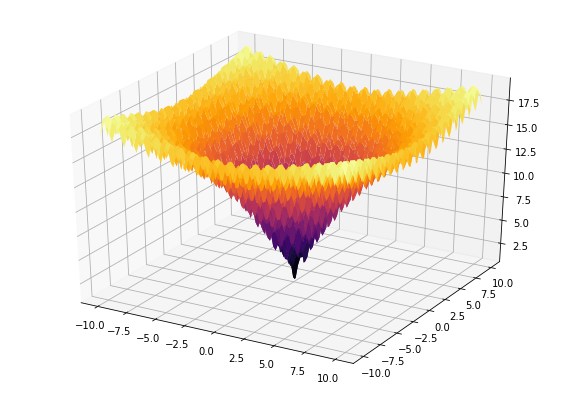

In [4]:
%matplotlib inline
def J1(x):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2))) - np.exp(0.5*(np.cos(2*x[0]*np.pi) + np.cos(2*x[1]*np.pi))) + np.e + 20

def J1_graph(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2))) - np.exp(0.5*(np.cos(2*x*np.pi) + np.cos(2*y*np.pi))) + np.e + 20

size = 10
X = np.linspace(-size, size, 100)
Y = np.linspace(-size, size, 100)
X, Y = np.meshgrid(X, Y)
Z = J1_graph(X, Y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

Запустим алгоритм на тех же начальных данных, что и градиентный спуск:

In [5]:
points = ofSimplex(J1, fit = [4.3, 4.9], low = [3, 4.5], up = [4.5, 5.4])

Iterations: 51
Minimum value = 0.0000


Заметим, что в отличии от градиентного спуска, который сошелся к локальному минимуму, симплекс-метод нашел глобальный минимум:

<IPython.core.display.Javascript object>


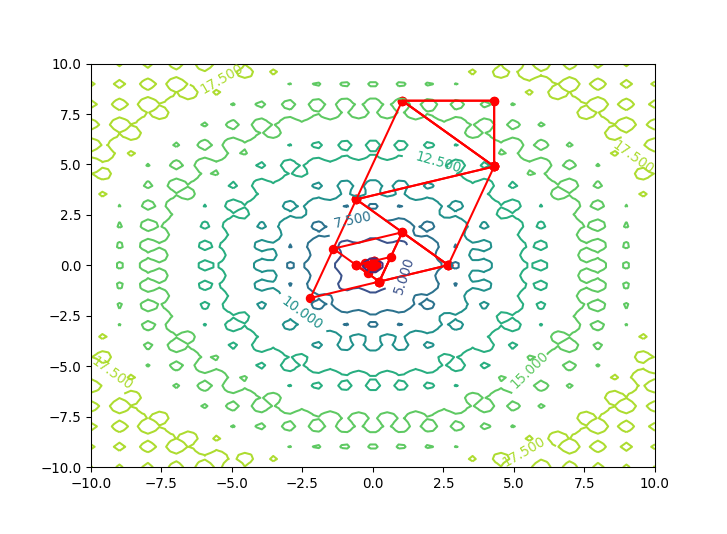

In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.axis([-size, size, -size, size])
#l1, = ax.plot([], [])
con = plt.contour(X, Y, Z)
plt.clabel(con)

def animate(i):
    x1 = np.concatenate([points[i][0][0, :], [points[i][1][0]]])
    x2 = np.concatenate([points[i][0][1, :], [points[i][1][1]]])
    plt.plot(x1, x2, 'r')
    plt.scatter(x1, x2, c='r')
    
fps = 2 # frame per sec
ani = animation.FuncAnimation(fig, animate, frames=len(points), interval=1000.0 / fps)

## Функция Букина:

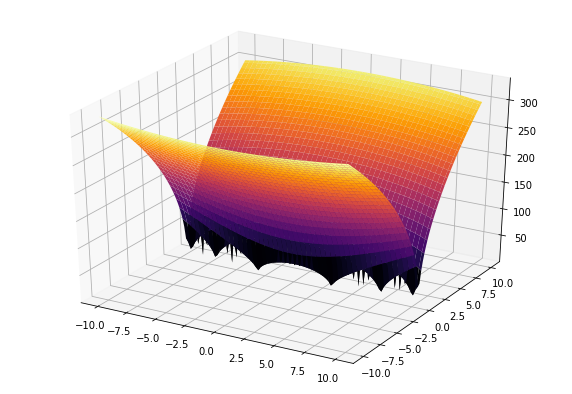

In [10]:
%matplotlib inline
def J2(x):
    return 100*np.sqrt(np.abs(x[1]-0.01*x[0]*x[0])) + 0.01*np.abs(x[0]+10) 
def J2_graph(x, y):
    return 100*np.sqrt(np.abs(y-0.01*x*x)) + 0.01*np.abs(x+10) 

size = 10
X = np.linspace(-size, size, 100)
Y = np.linspace(-size, size, 100)
X, Y = np.meshgrid(X, Y)
Z = J2_graph(X, Y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')

In [11]:
points = ofSimplex(J2, fit = [-10, -2], low = [-3, -7], up = [-8, -4.5])

Iterations: 49
Minimum value = 0.0489


In [15]:
%matplotlib notebook

<IPython.core.display.Javascript object>


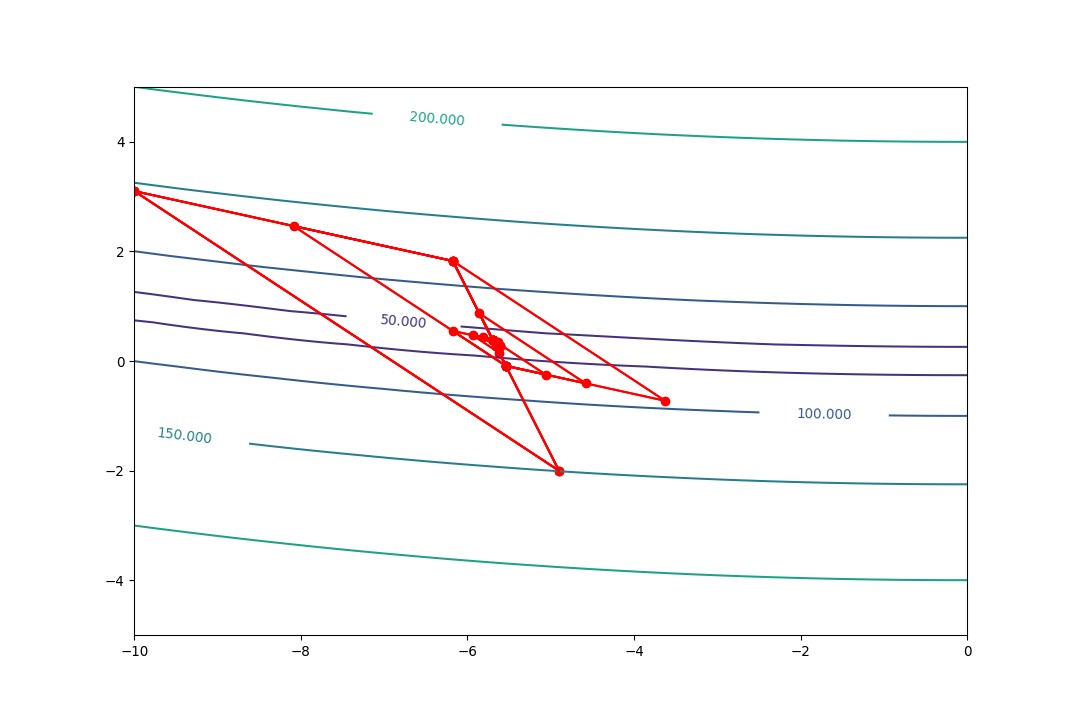

In [16]:
fig, ax = plt.subplots()
ax.axis([-size, 0, -5, 5])
#l1, = ax.plot([], [])
con = plt.contour(X, Y, Z)
plt.clabel(con)

def animate(i):
    x1 = np.concatenate([points[i][0][0, :], [points[i][1][0]]])
    x2 = np.concatenate([points[i][0][1, :], [points[i][1][1]]])
    plt.plot(x1, x2, 'r')
    plt.scatter(x1, x2, c='r')
    
fps = 2 # frame per sec
ani = animation.FuncAnimation(fig, animate, frames=len(points), interval=1000.0 / fps)